In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Order_Details = pd.read_csv('Order_details-masked.csv')

In [4]:
#create a new column called Time that has the DateTime format after converting the Transaction Date column into it.
#here we have taken transaction
#date column
Order_Details['Time'] = pd.to_datetime(Order_Details['Transaction Date'])

#after that we extracted hour from Transaction date column
Order_Details['Hour'] = (Order_Details['Time']).dt.hour

In [5]:
'''We then require the "n" busiest hours. Fo that, we get the first "n" entries in a list containing the occurences rates of the hours when the transaction took place.'''
#n=24 in this case, can be modifies as per need to see top 'n' busiest hours
timemost1 = Order_Details['Hour'].value_counts().index.tolist()[:24]
timemost2 = Order_Details['Hour'].value_counts().values.tolist()[:24]

In [9]:
#finally we stack the indices (hour) and frequencies together to yield the final result
tmost = np.column_stack((timemost1,timemost2))

print(" Hour of Day" + "\t" + "Cumulative Number of Purchases \n")
print('\n'.join('\t\t'.join(map(str,row)) for row in tmost))

 Hour of Day	Cumulative Number of Purchases 

23		51
12		51
22		45
19		42
21		41
15		41
20		39
11		37
13		33
18		33
16		29
14		28
17		27
10		24
0		17
9		14
8		10
7		6
1		4
2		3
5		3
6		2
3		1


In [13]:
#before visualization we can make the list slightly more customizable
timemost = Order_Details['Hour'].value_counts()
timemost1 = []

for i in range(0,23):
    timemost1.append(i)
timemost2 = timemost.sort_index()
timemost2.tolist()
timemost2 = pd.DataFrame(timemost2)

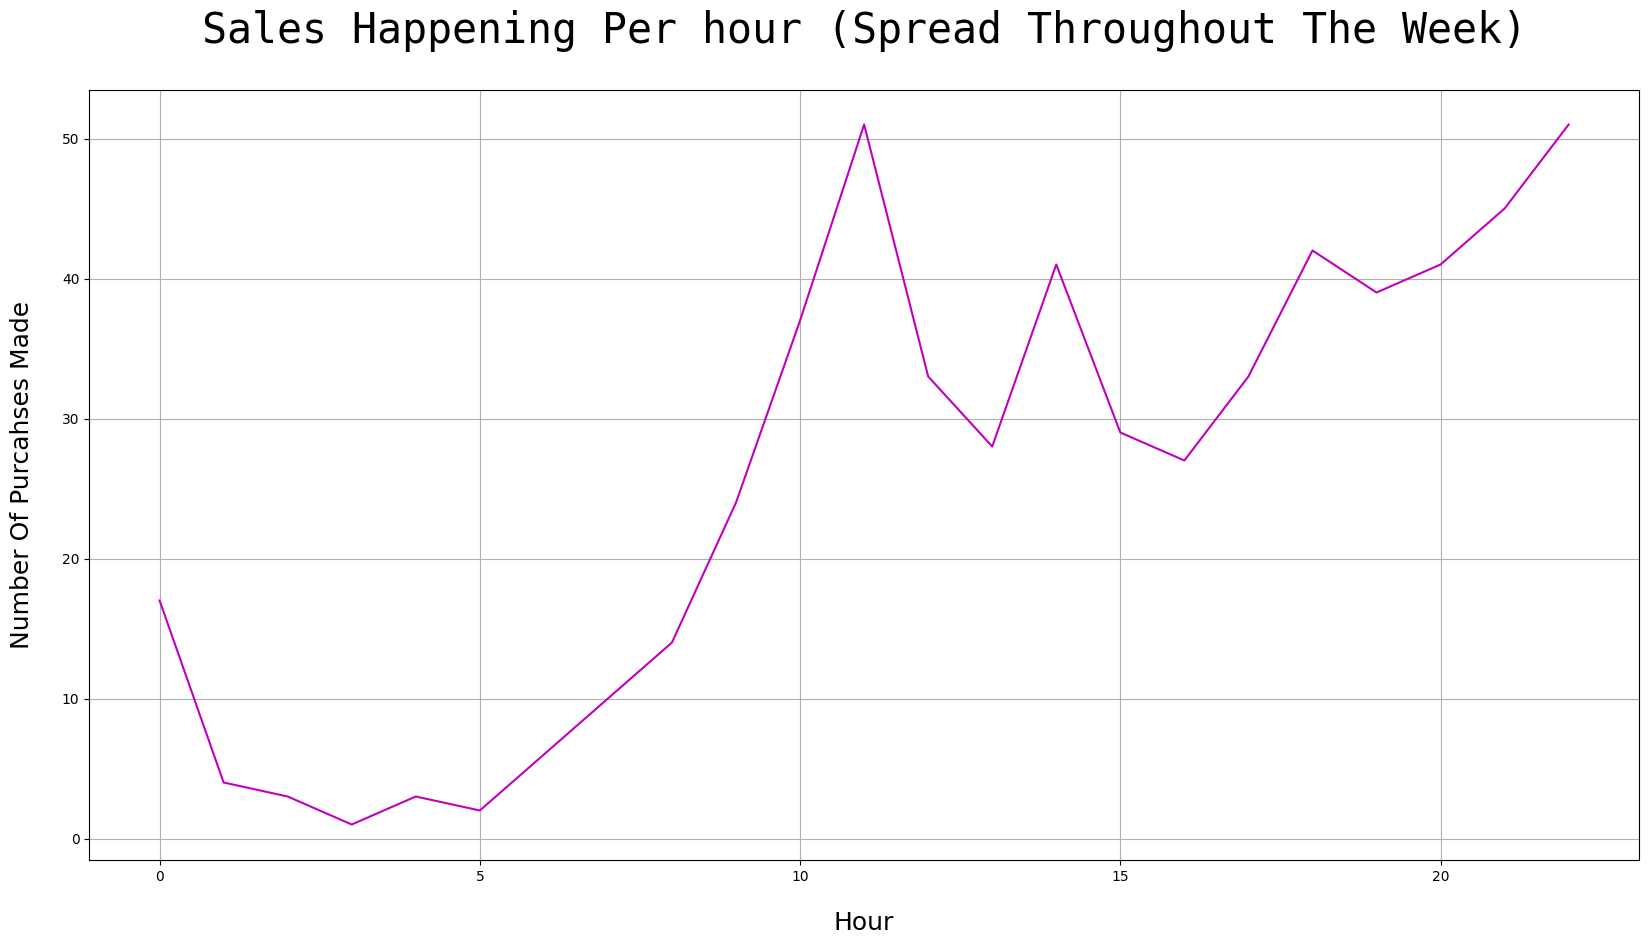

In [16]:
plt.figure(figsize=(20,10))

plt.title('Sales Happening Per hour (Spread Throughout The Week)',
          fontdict={'fontname':'monospace','fontsize':30},y=1.05)
plt.ylabel("Number Of Purcahses Made", fontsize=18, labelpad=20)
plt.xlabel("Hour",fontsize=18,labelpad=20)
plt.plot(timemost1, timemost2, color='m')
plt.grid()
plt.show()

In [ ]:
'''The results are indicative of how sales typically peak in late evening hours prominently, and this data can be incorporated into business decisions to promote a product during that time specifically.'''